In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.stats

In [2]:
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 16
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 14
#set size of num_bers on x-axis
plt.rcParams['xtick.labelsize'] = 12
#set size of num_bers on y-axis
plt.rcParams['ytick.labelsize'] = 12
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
plt.rcParams['lines.markersize'] = 10
#set num_ber of times marker is shown when displaying legend
plt.rcParams['legend.numpoints'] = 1
#Set size of type in legend
plt.rcParams['legend.fontsize'] = 10
#set pixel density of figures
plt.rcParams['figure.dpi'] = 300

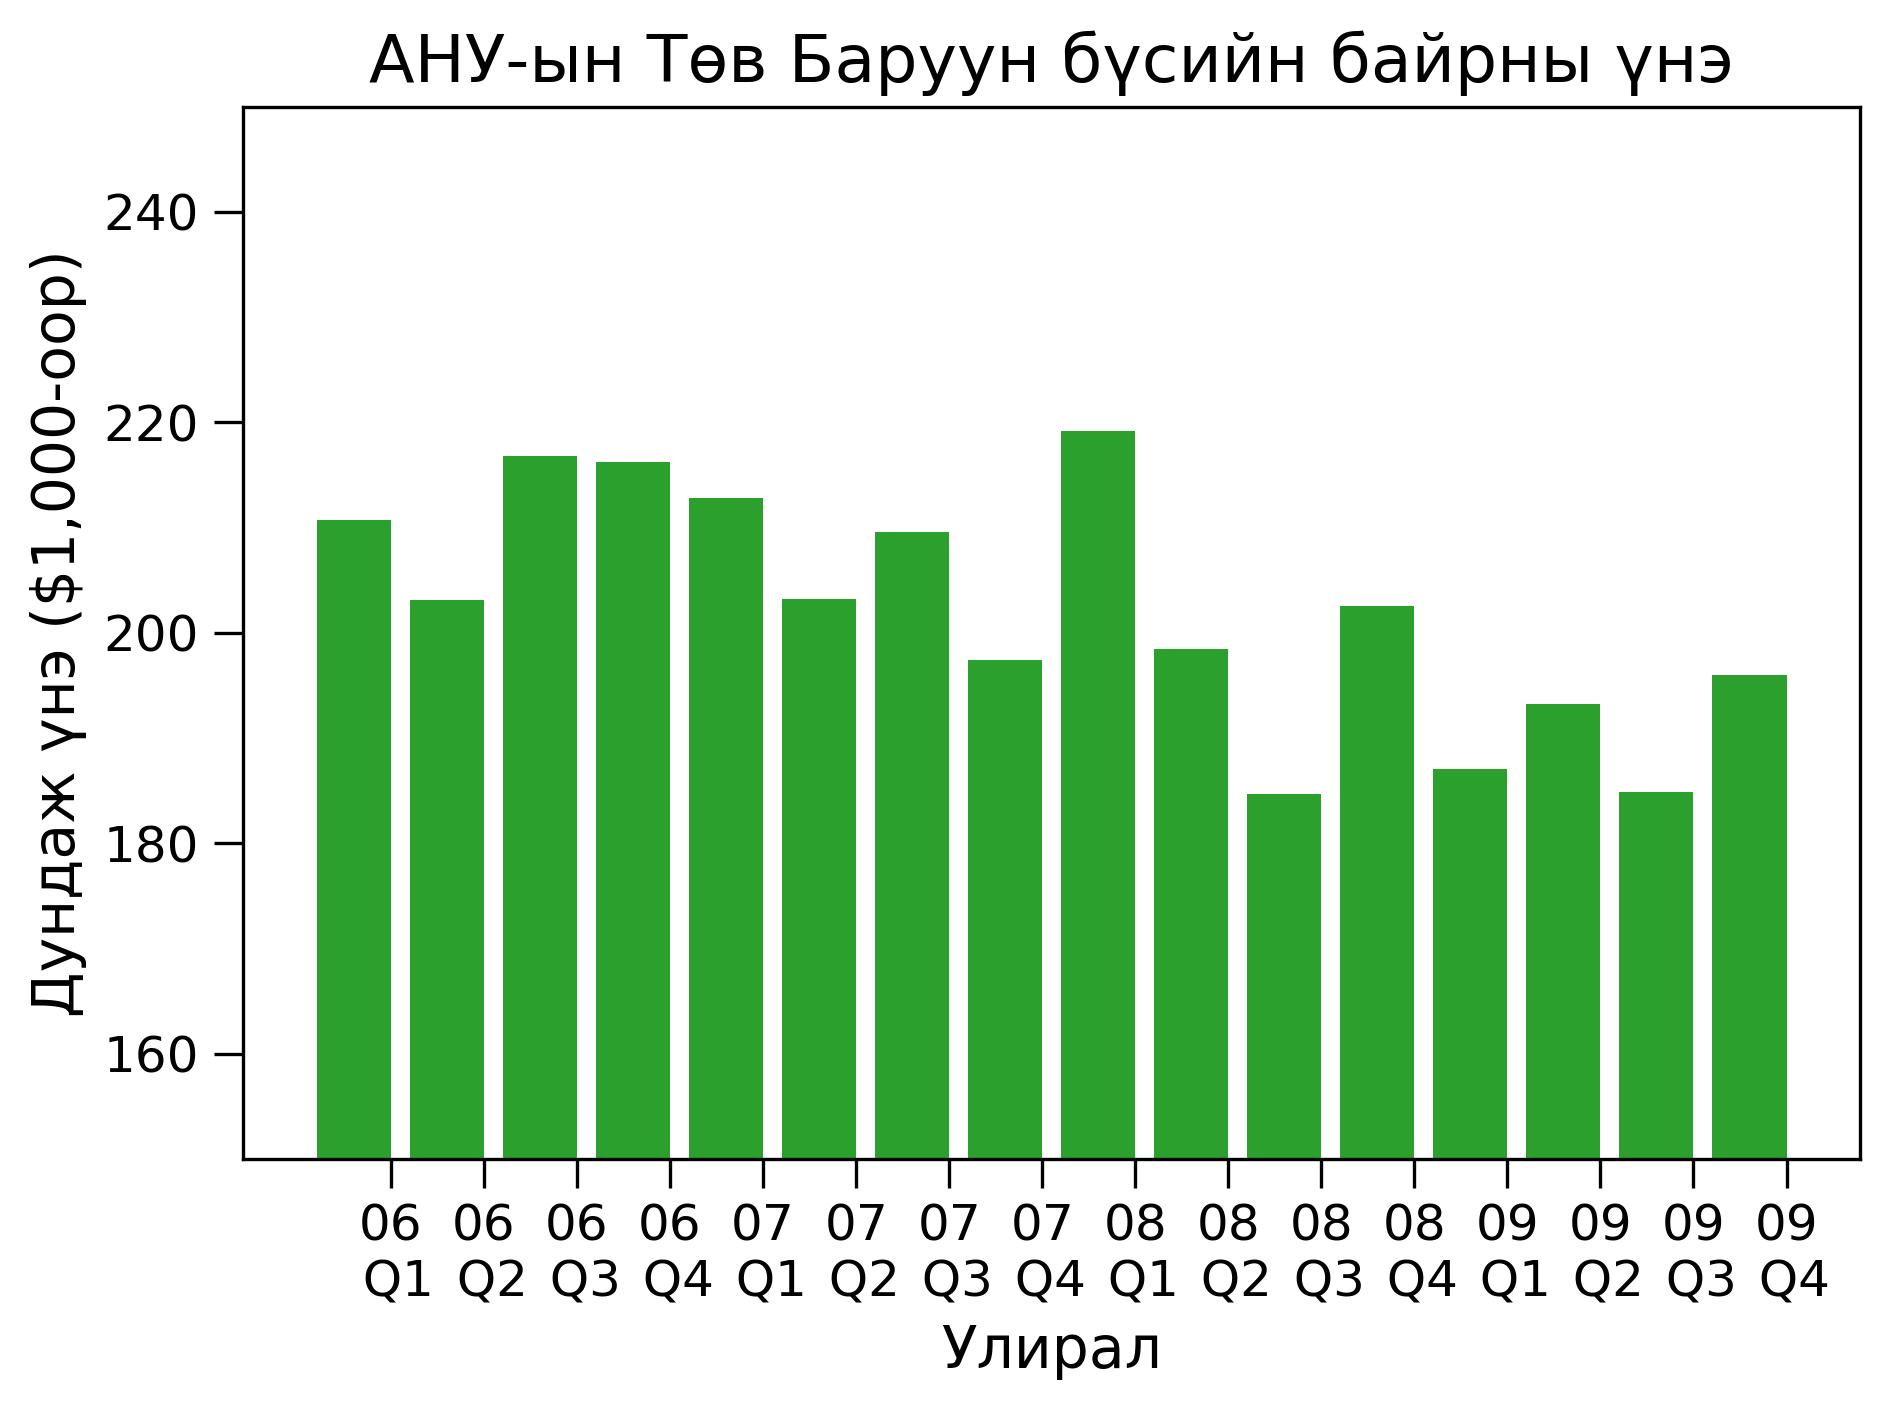

In [4]:
# Figure 22-2 on page 492
def plot_housing(impression):
    """Assumes impression a str. Must be one of 'flat',
         'volatile,' and 'fair'
       Produce bar chart of housing prices over time"""
    labels, prices = ([], [])
    with open('midWestHousingPrices.csv', 'r') as f:
        #Each line of file contains year quarter price
        #for Midwest region of U.S.
        for line in f:
            year, quarter, price = line.split(',')
            label = year[2:4] + '\n Q' + quarter[1]
            labels.append(label)
            prices.append(int(price)/1000)
    quarters = np.arange(len(labels)) #x coords of bars
    width = 0.8 #Width of bars
    plt.bar(quarters, prices, width)
    plt.xticks(quarters+width/2, labels)
    plt.title('АНУ-ын Төв Баруун бүсийн байрны үнэ')
    plt.xlabel('Улирал')
    plt.ylabel('Дундаж үнэ ($1,000-оор)')
    if impression == 'flat':
        plt.ylim(1, 500)
    elif impression == 'volatile':
        plt.ylim(180, 220)
    elif impression == 'fair':
        plt.ylim(150, 250)
    else:
        raise ValueError
plot_housing('flat')
#plt.figure()
plt.tight_layout()
plt.savefig('figure22-1a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plot_housing('volatile')
#plt.figure()
plt.tight_layout()
plt.savefig('figure22-1b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plot_housing('fair')
#plt.figure()
plt.tight_layout()
plt.savefig('figure22-3.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

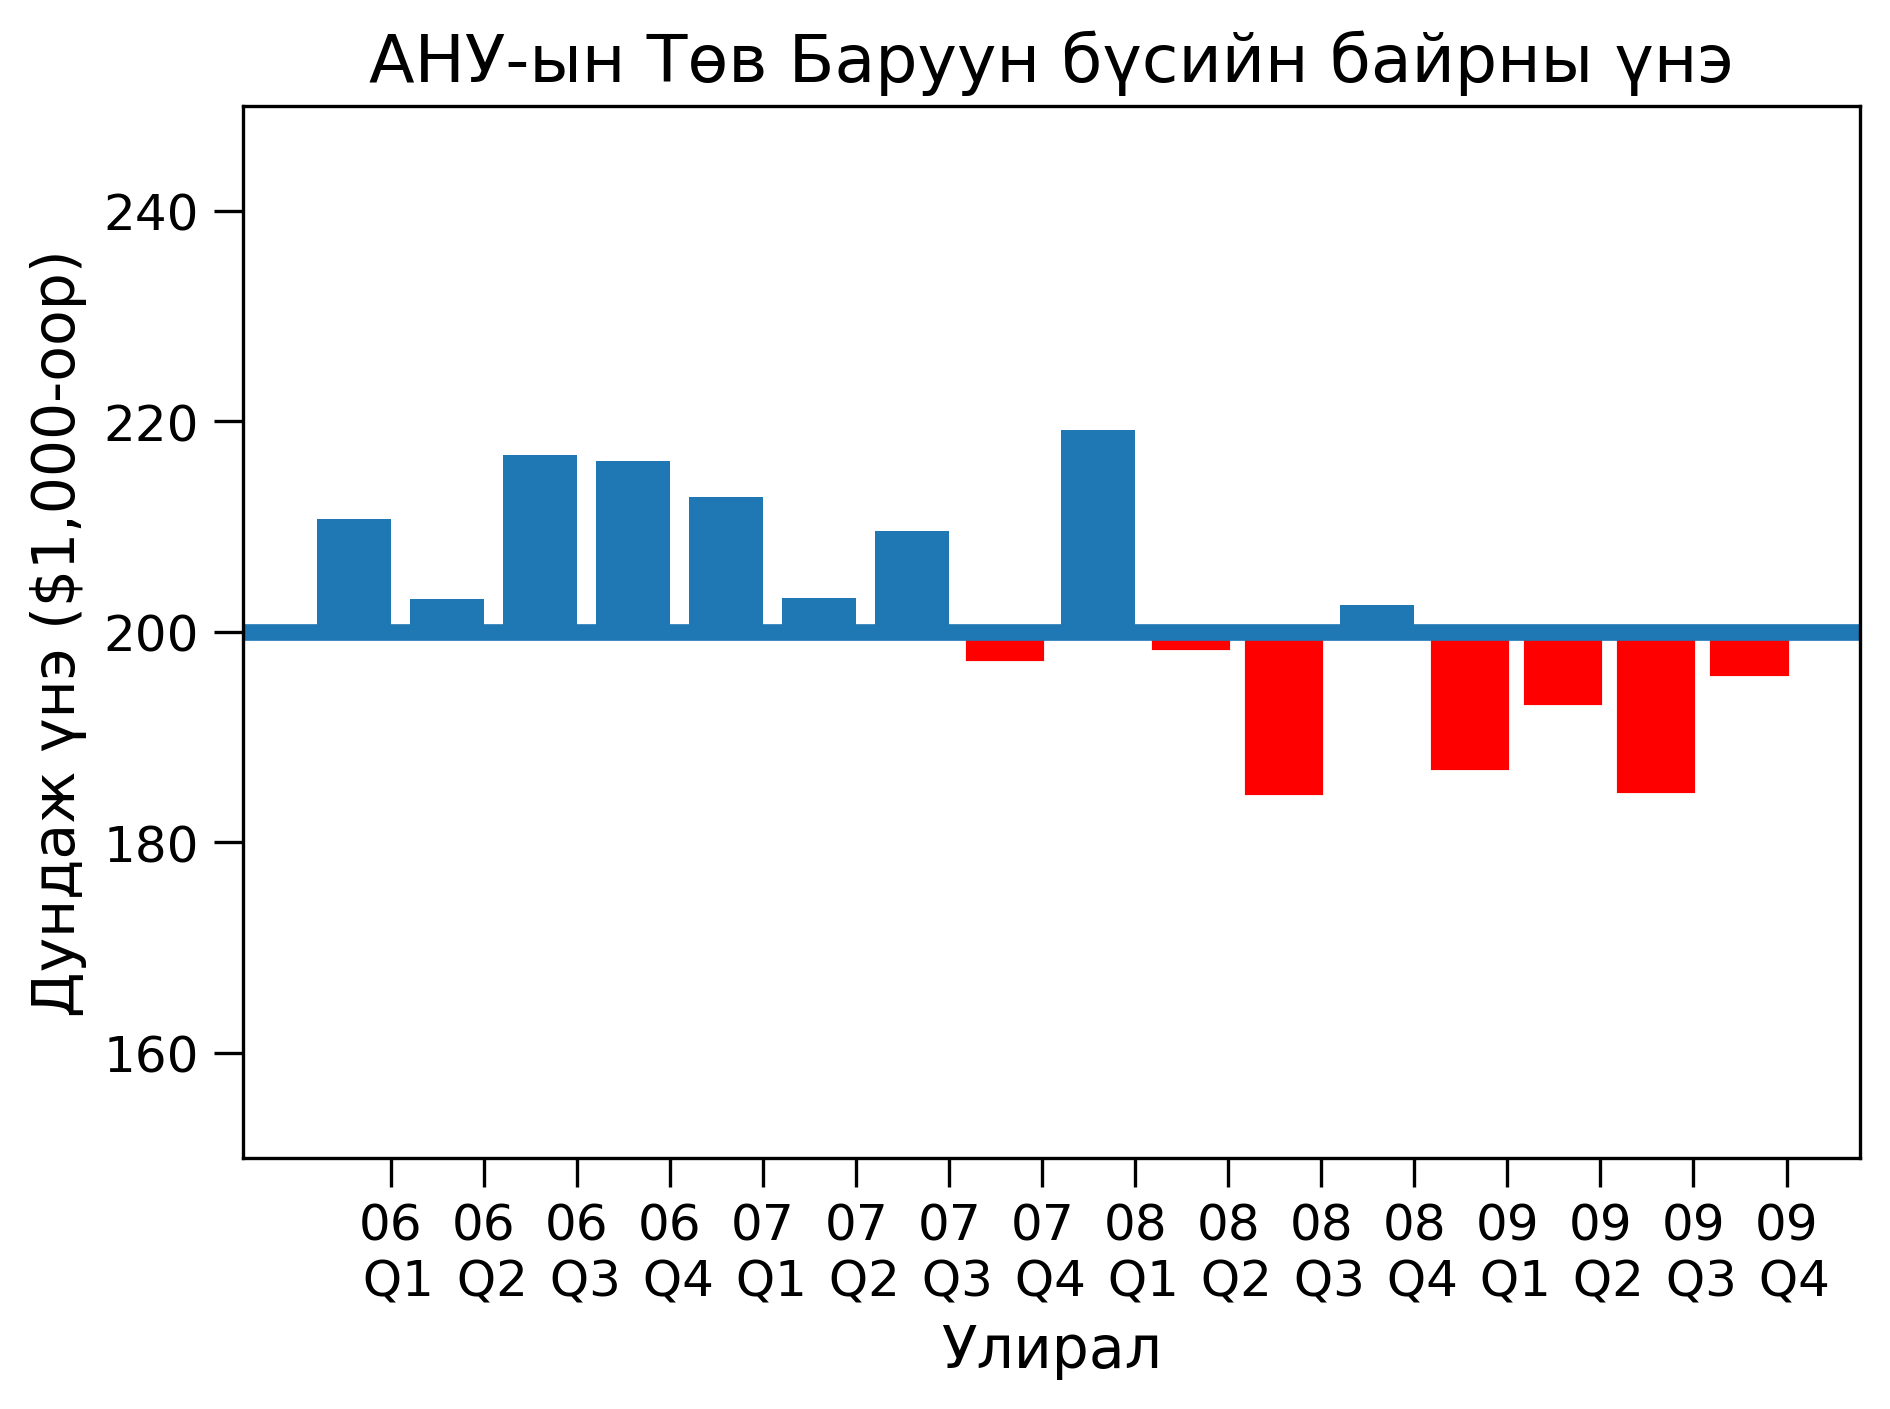

In [5]:
# Solution to finger exercise on page 493      
def plot_housing(impression):
    """Assumes impression a str. Must be one of 'flat',
          'volatile,' and 'fair'
        Produce bar chart of housing prices over time"""
    labels, prices = ([], [])
    with open('midWestHousingPrices.csv', 'r') as f:
        #Each line of file contains year quarter price
        #for Midwest region of U.S.
        for line in f:
            year, quarter, price = line.split(',')
            label = year[2:4] + '\n Q' + quarter[1]
            labels.append(label)
            prices.append(int(price)/1000)
    quarters = np.arange(len(labels)) #x coords of bars
    width = 0.8 #Width of bars
    baseline = 200
    bars = plt.bar(quarters, np.array(prices) - baseline, width,
                    bottom = baseline)
    for b in bars:
        if b.get_height() < 0:
            b.set_color('r')
    plt.axhline(200)
    plt.xticks(quarters+width/2, labels)
    plt.title('АНУ-ын Төв Баруун бүсийн байрны үнэ')
    plt.xlabel('Улирал')
    plt.ylabel('Дундаж үнэ ($1,000-оор)')
    if impression == 'flat':
        plt.ylim(1, 500)
    elif impression == 'volatile':
        plt.ylim(180, 220)
    elif impression == 'fair':
        plt.ylim(150, 250)
    else:
        raise ValueError

plot_housing('fair')
plt.tight_layout()
plt.savefig('figure22-4.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

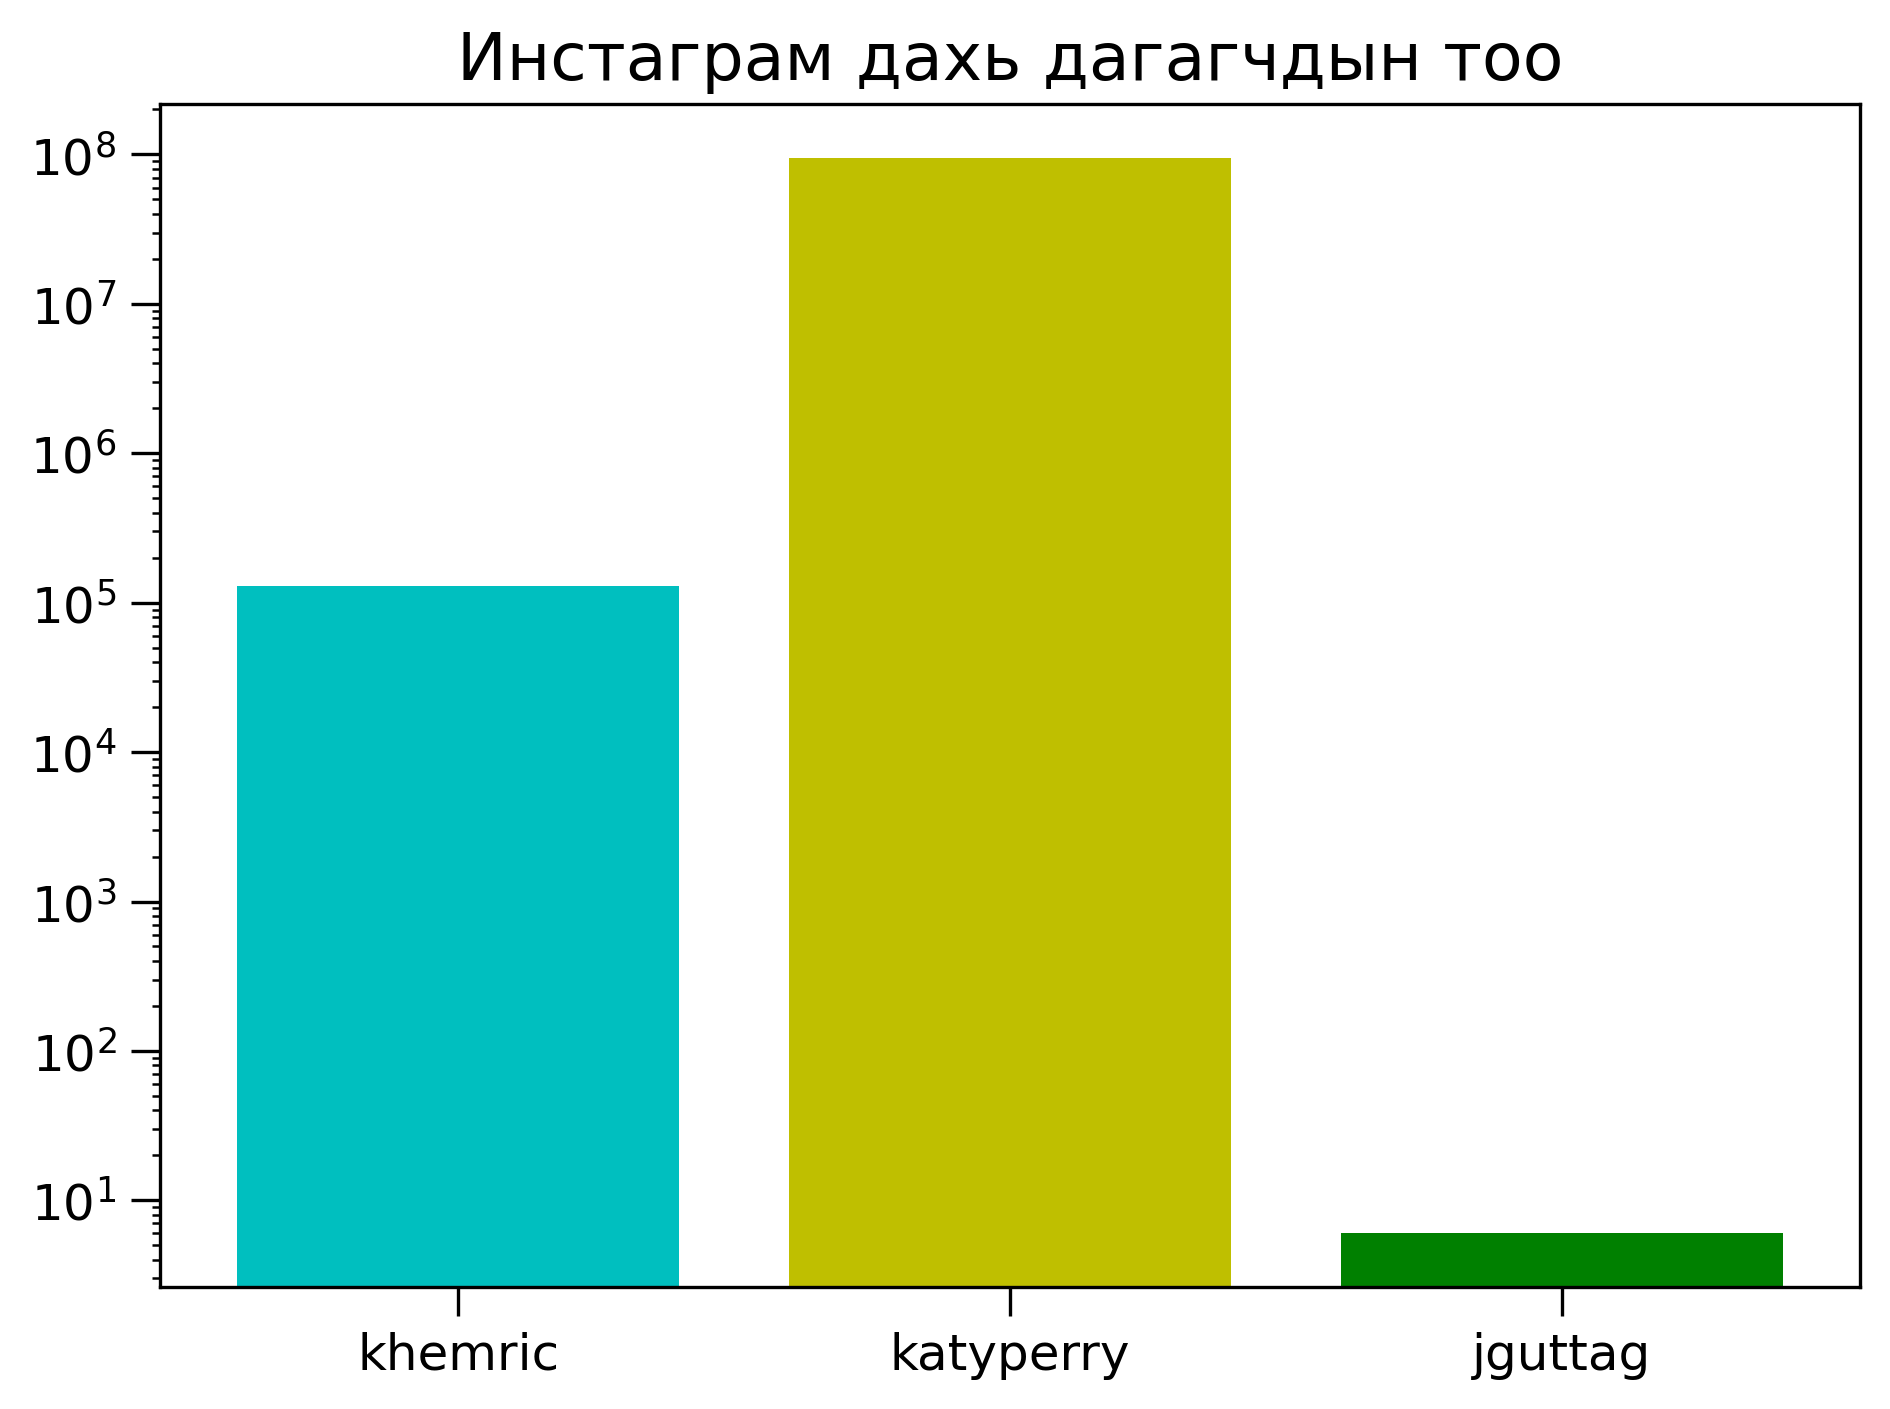

In [6]:
# Code to produce plots in Figure 22-5 on page 494
def plot_followers(with_jguttag):
    if with_jguttag:
        plt.bar('jguttag', 6, color = 'g')
    plt.bar('khemric', 130000, color = 'c')
    plt.bar('katyperry', 95000000, color = 'y')
    plt.title('Инстаграм дахь дагагчдын тоо')
    plt.semilogy()
    
plot_followers(False)
#plt.figure()
plt.tight_layout()
plt.savefig('figure22-5a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plot_followers(True)
#plt.figure()
plt.tight_layout()
plt.savefig('figure22-5b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

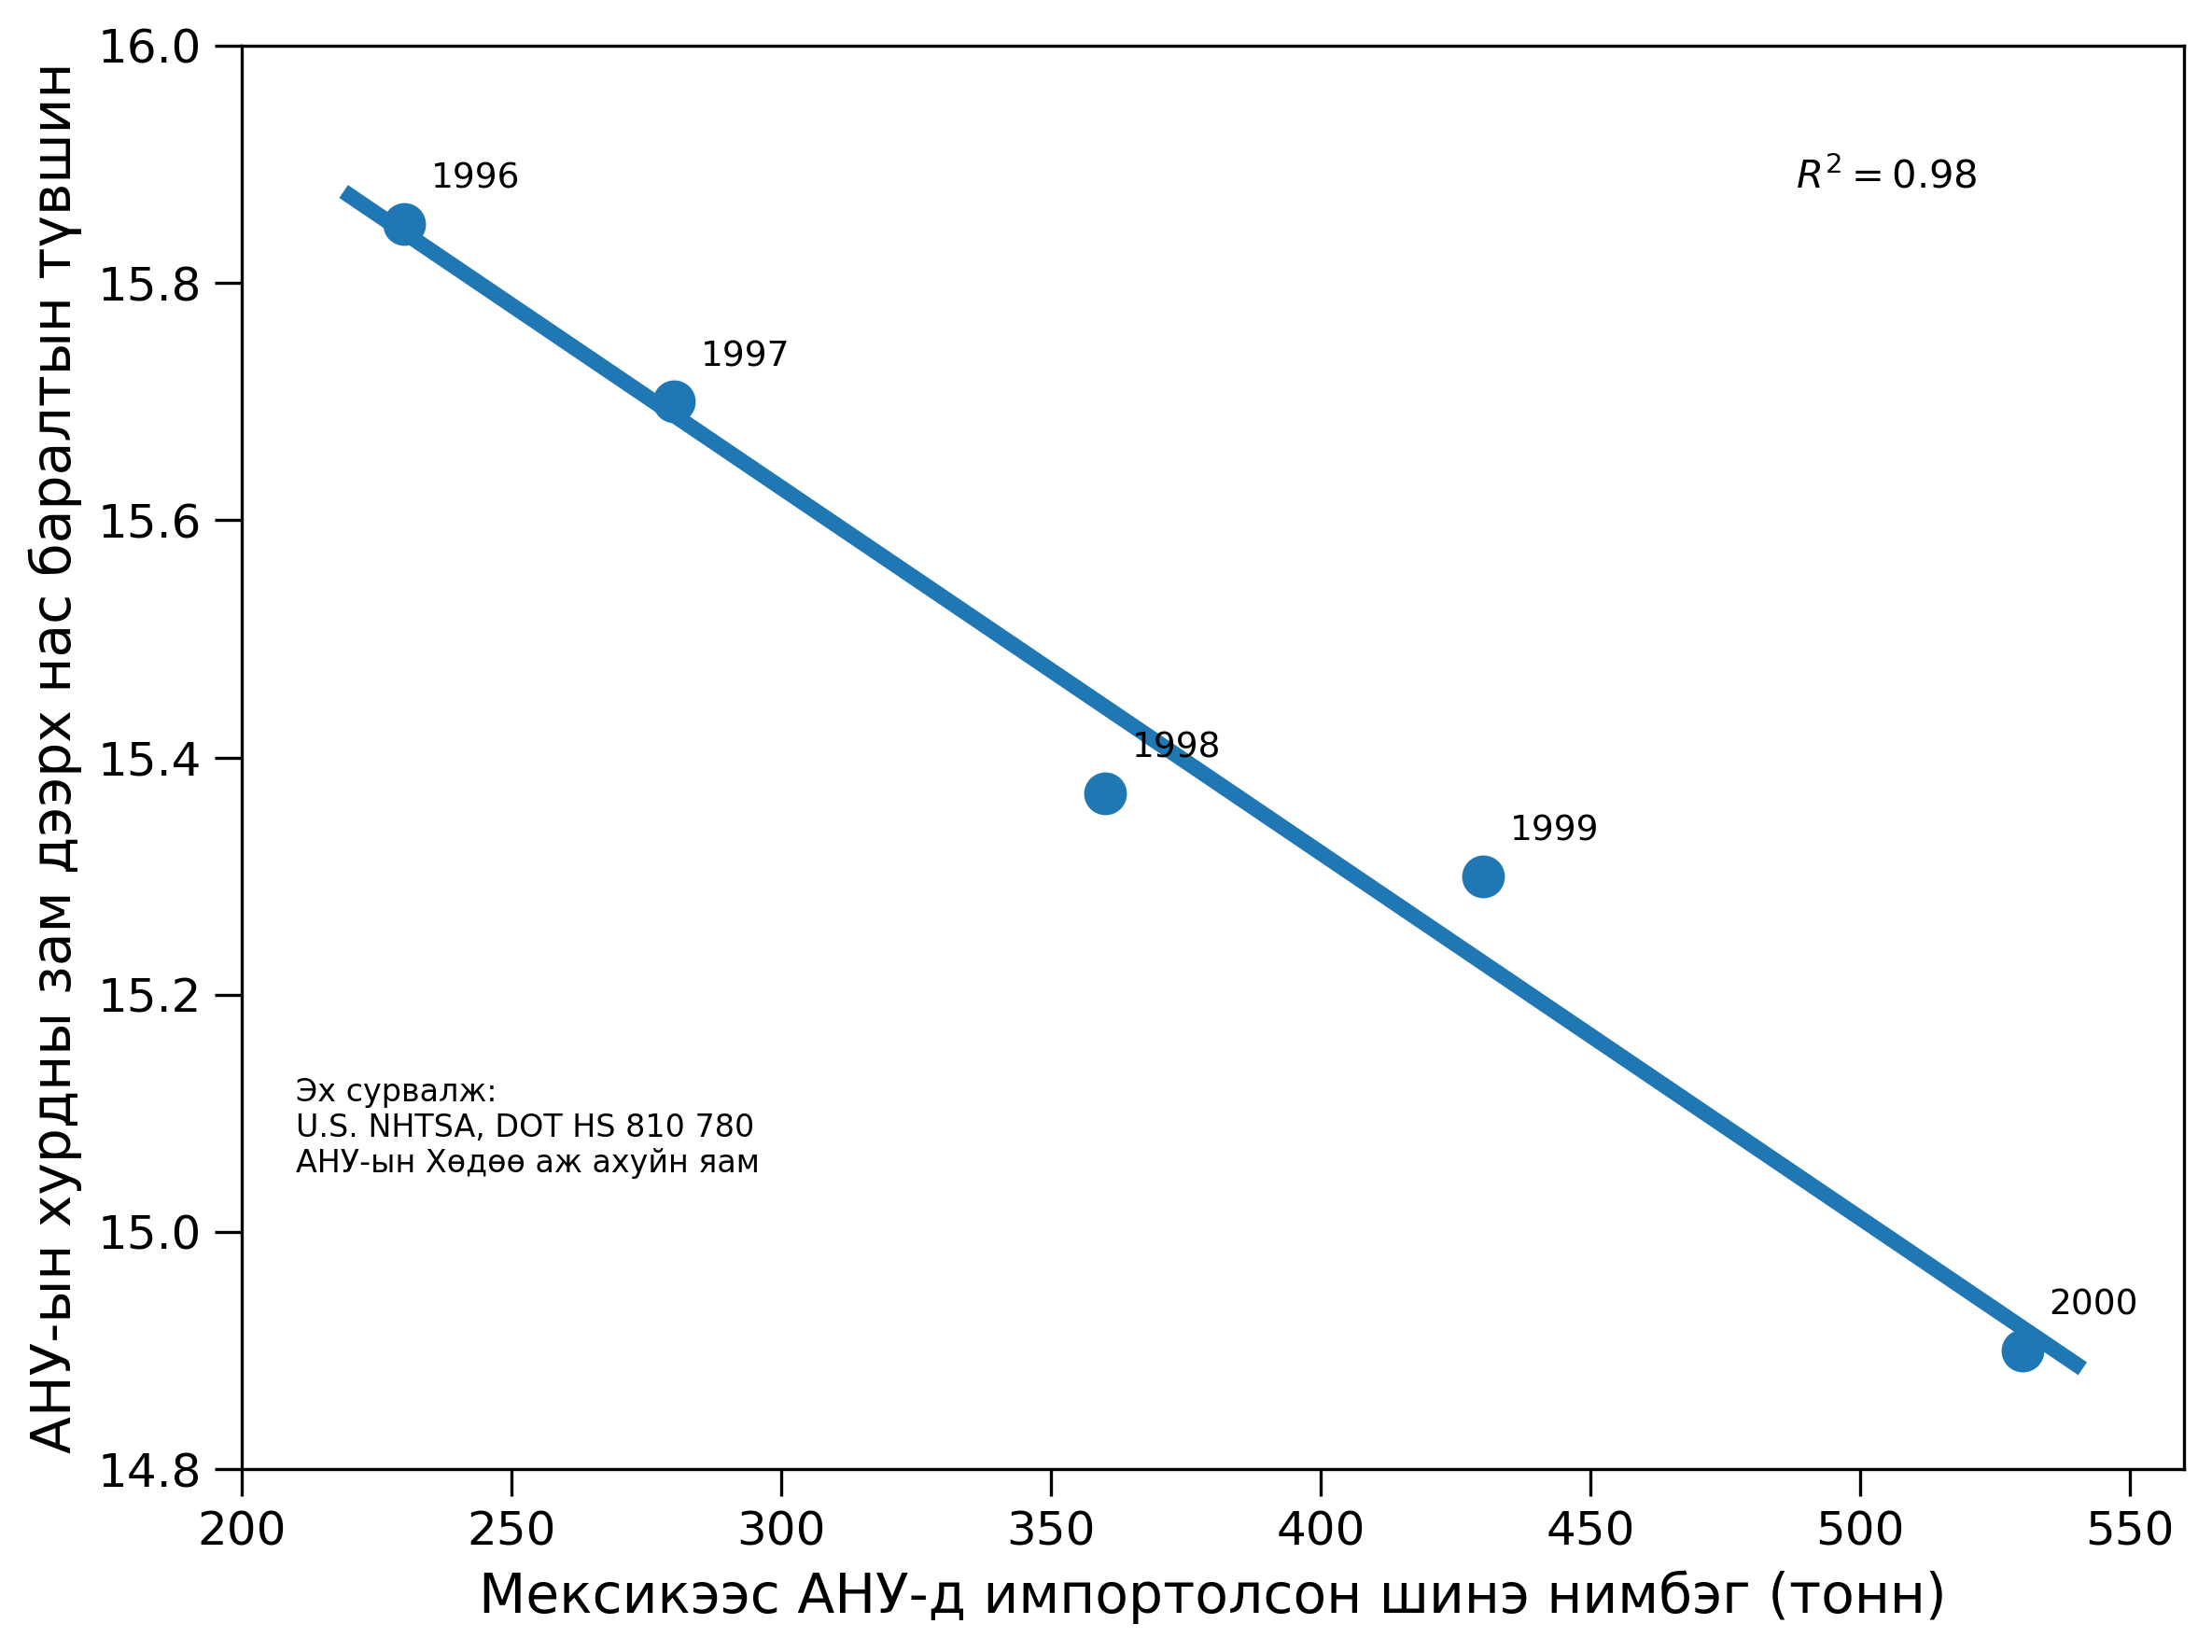

In [24]:
# Data (example values similar to the original graph)
years = np.array([1996, 1997, 1998, 1999, 2000])
lemons = np.array([230, 280, 360, 430, 530])      # Fresh lemons imported (metric tons)
fatality_rate = np.array([15.85, 15.7, 15.37, 15.3, 14.9])  # Total U.S. highway fatality rate

# Linear regression line
coeffs = np.polyfit(lemons, fatality_rate, 1)
poly = np.poly1d(coeffs)

x_line = np.linspace(lemons.min() - 10, lemons.max() + 10, 100)
y_line = poly(x_line)

# R^2 calculation
y_pred = poly(lemons)
ss_res = np.sum((fatality_rate - y_pred) ** 2)
ss_tot = np.sum((fatality_rate - fatality_rate.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter points
ax.scatter(lemons, fatality_rate)

# Regression line
ax.plot(x_line, y_line)

# Year labels next to each point
for x, y, year in zip(lemons, fatality_rate, years):
    ax.text(x + 5, y + 0.03, str(year), fontsize=9)

# Axes labels (Mongolian)
ax.set_xlabel("Мексикээс АНУ-д импортолсон шинэ нимбэг (тонн)")
ax.set_ylabel("АНУ-ын хурдны зам дээрх нас баралтын түвшин")

# Axis limits to look similar to the image
ax.set_xlim(200, 560)
ax.set_ylim(14.8, 16.0)

# R^2 text in the top-right corner (axes coordinates)
ax.text(0.8, 0.9, f"$R^2 = {r2:.2f}$", transform=ax.transAxes)

# Sources text
ax.text(210, 15.05,
        "Эх сурвалж:\n"
        "U.S. NHTSA, DOT HS 810 780\n"
        "АНУ-ын Хөдөө аж ахуйн яам",
        fontsize=8)

plt.tight_layout()
plt.savefig('figure22-6.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

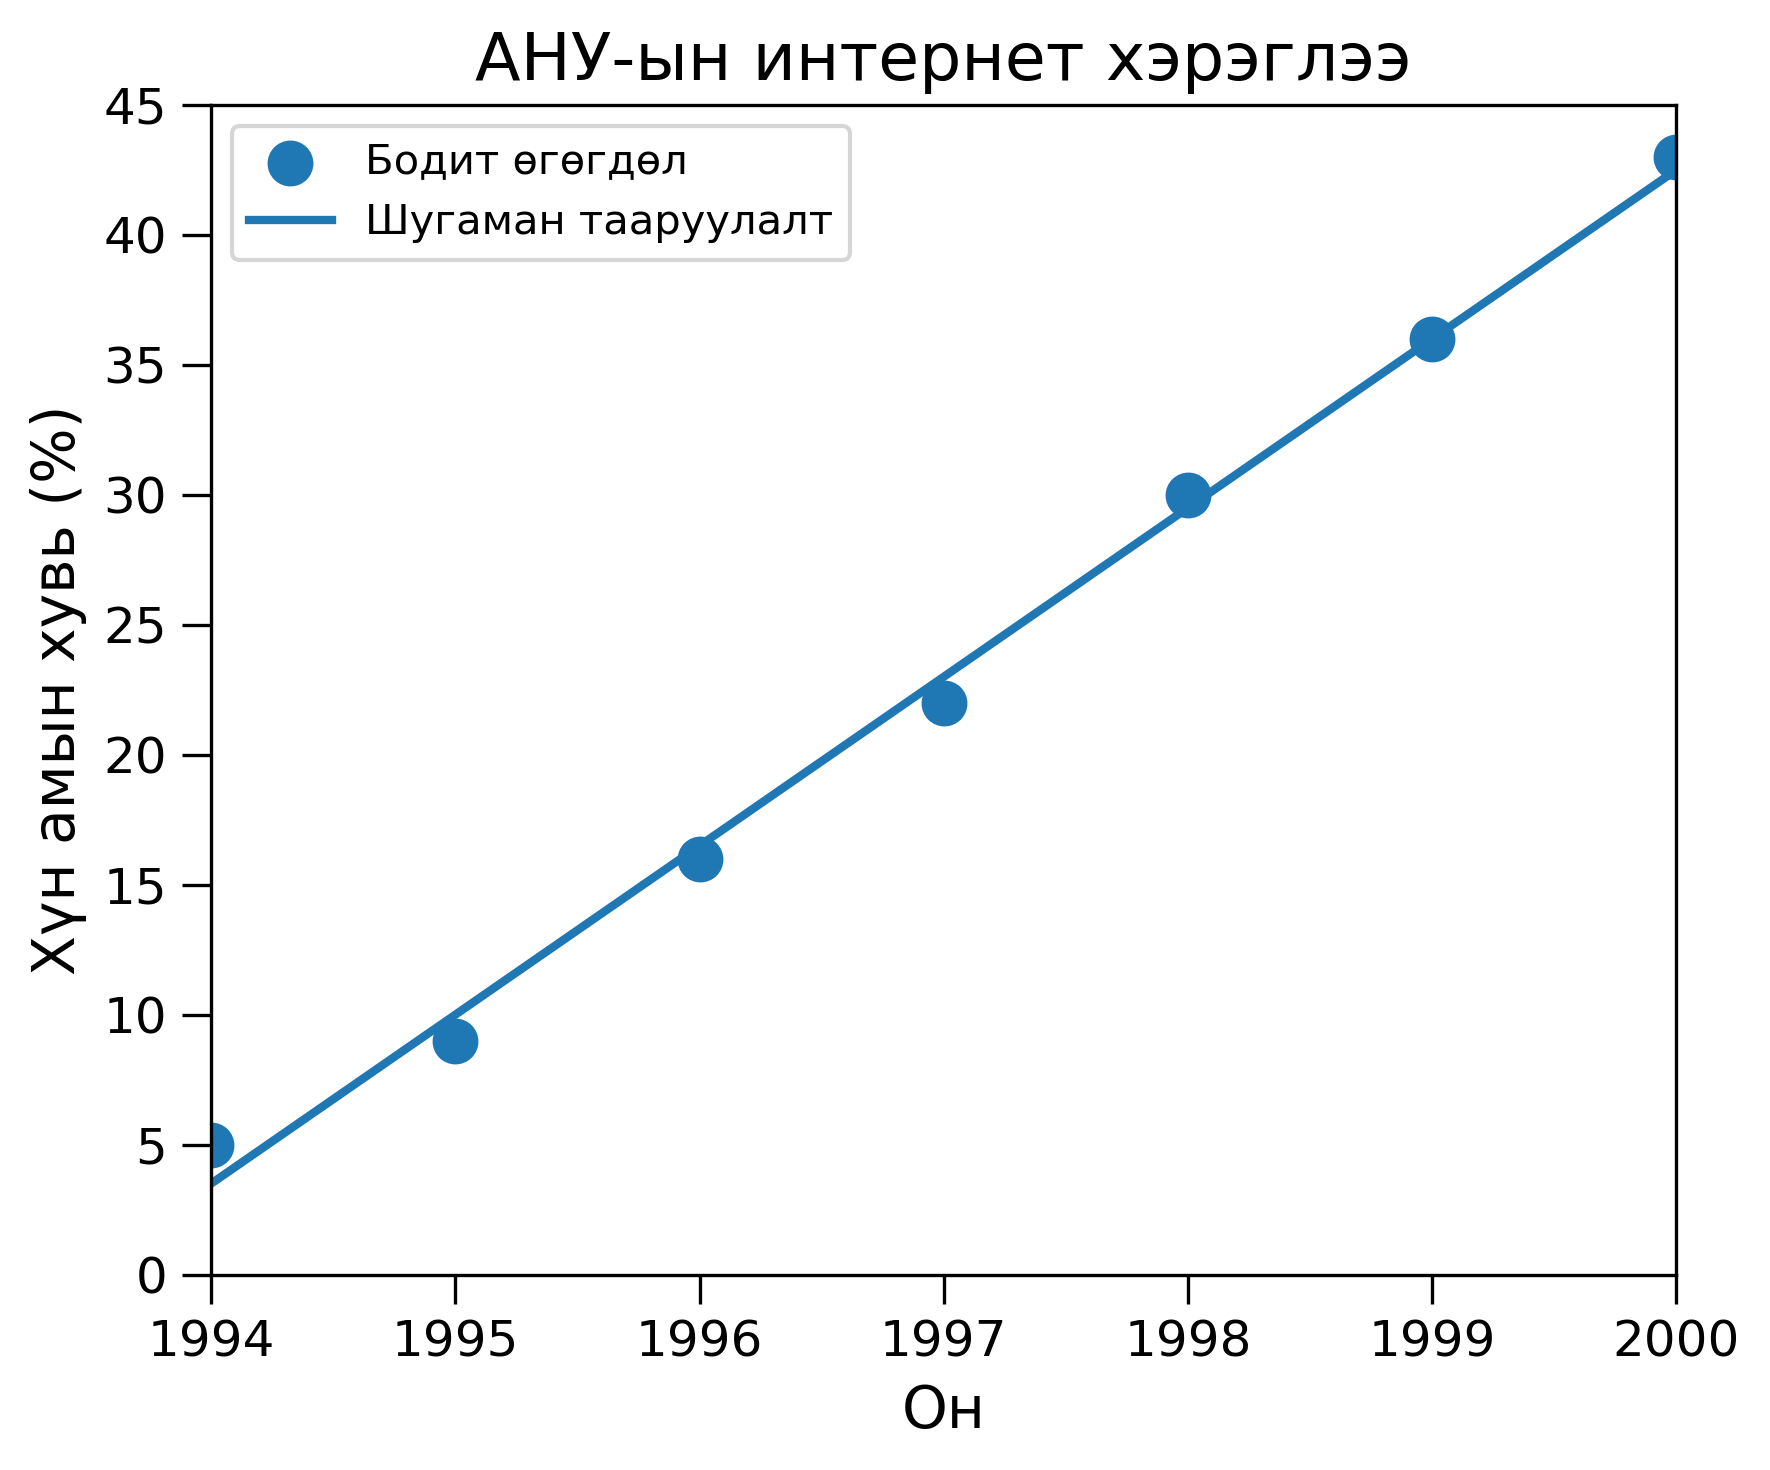

In [29]:

# --- Actual data (approximate from the image) ---
years = np.array([1994, 1995, 1996, 1997, 1998, 1999, 2000])
usage = np.array([5, 9, 16, 22, 30, 36, 43])   # % of population

# --- Linear regression (least squares line) ---
coeffs = np.polyfit(years, usage, 1)
m, b = coeffs
x_line = np.linspace(1994, 2000, 200)
y_line = m * x_line + b

# --- Plot ---
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(years, usage, label="Бодит өгөгдөл", marker="o")
ax.plot(x_line, y_line, label="Шугаман тааруулалт", linewidth=2)

ax.set_xlabel("Он")
ax.set_ylabel("Хүн амын хувь (%)")
ax.set_title("АНУ-ын интернет хэрэглээ")
ax.set_xlim(1994, 2000)
ax.set_ylim(0, 45)
ax.legend(loc="upper left")

plt.tight_layout()
plt.savefig('figure22-11a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

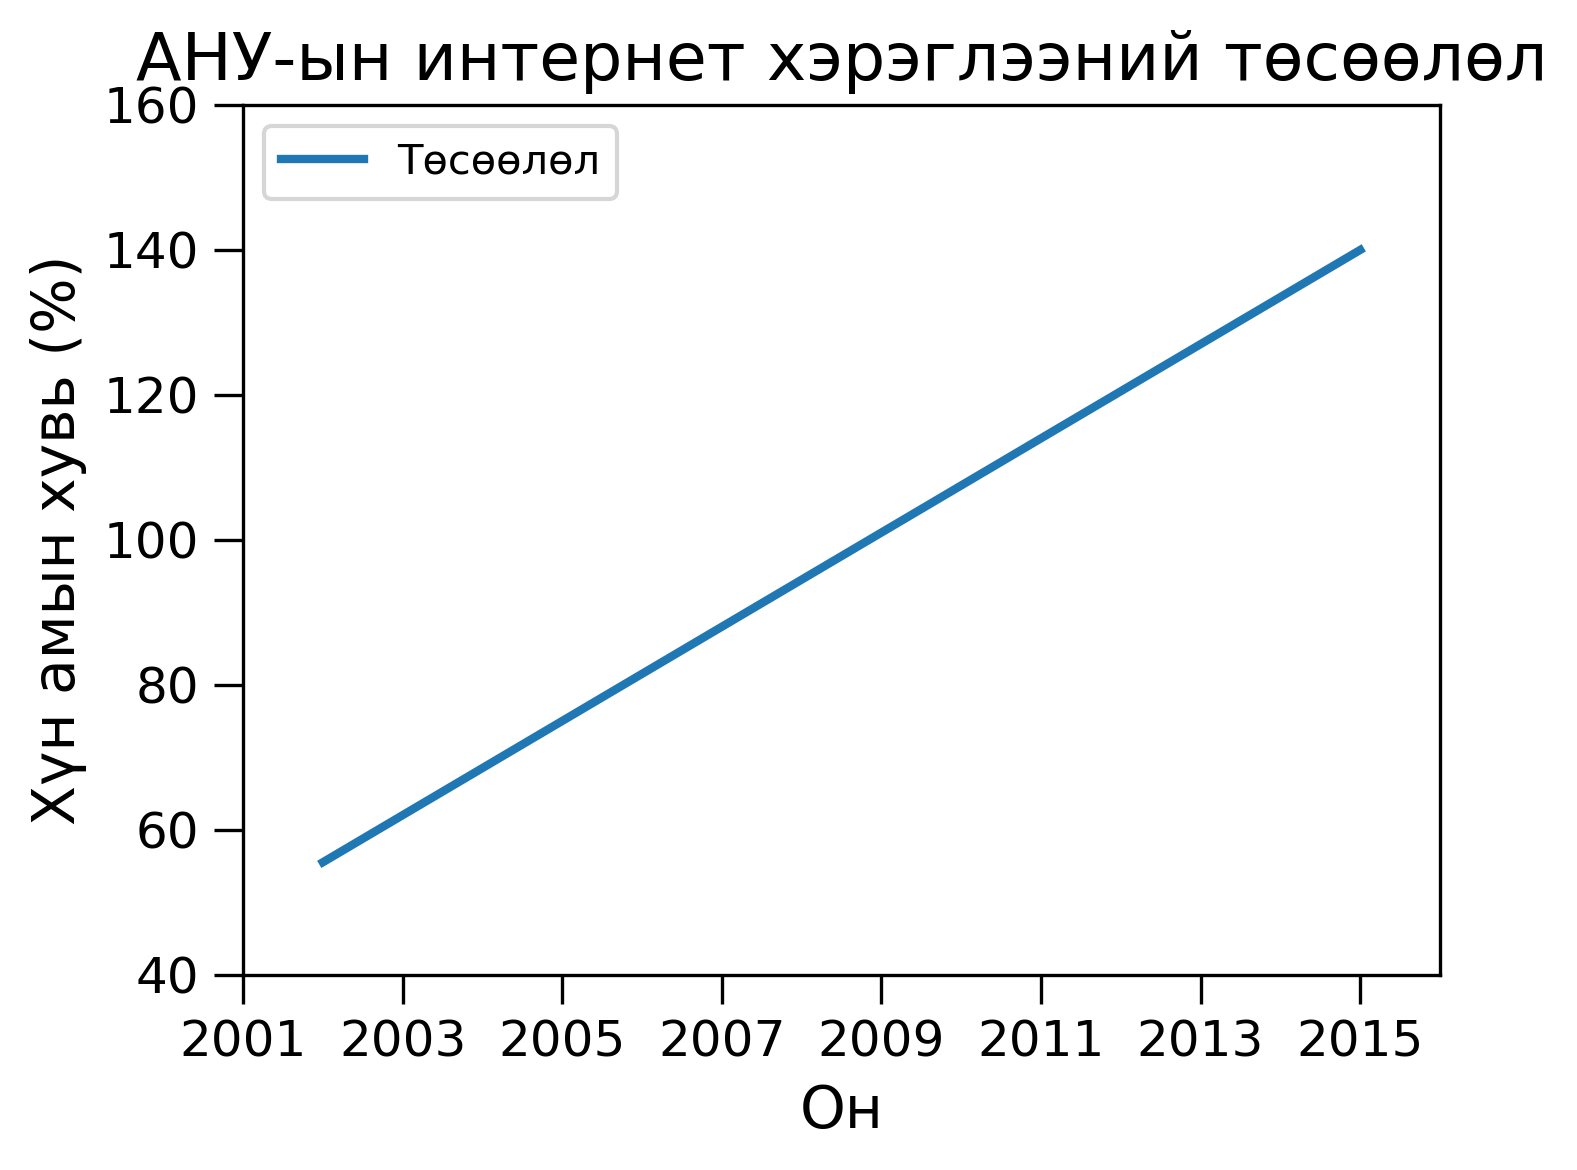

In [36]:

# --- Same actual data to compute the linear trend ---
years_actual = np.array([1994, 1995, 1996, 1997, 1998, 1999, 2000])
usage_actual = np.array([5, 9, 16, 22, 30, 36, 43])

# Linear regression coefficients from actual data
m, b = np.polyfit(years_actual, usage_actual, 1)

# --- Projection years and values ---
years_proj = np.arange(2002, 2016)          # 2001–2016
usage_proj = m * years_proj + b             # projected % of population

# --- Plot ---
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(years_proj, usage_proj, linewidth=2, label="Төсөөлөл")

ax.set_xlabel("Он")
ax.set_ylabel("Хүн амын хувь (%)")
ax.set_title("АНУ-ын интернет хэрэглээний төсөөлөл")
ax.set_xlim(2001, 2016)
ax.set_ylim(40, 160)
ax.set_xticks(np.arange(2001, 2016, 2))
ax.legend(loc="upper left")

plt.tight_layout()
plt.savefig('figure22-11b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)